In [1]:
import os
import numpy as np
import time
from astropy.io import fits
import matplotlib.pyplot as plt
import _pickle as cPickle
from multiprocessing import Pool
from blos_binning_helper import get_blos_inst_pixel

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

font = {'size'   : 18}

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

mpl.rc('font', **font)

/tmp/ipykernel_59796/790960243.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


```python=
get_blos_inst_pixel(folder, ang, snapshot, 0.35, inst=inst,downscale_mean=False, remainder_mode='round', \
                                                          refwv=refwv, dshape=288, pixel_res=20.833333, \
                                                          blos_method='CMILOS', return_mean=True, \
                                                          default_dir="/scratch/slam/sinjan/spinor_fwd")
```

In [2]:
def get_fields_from_pool_map(res):
    res_200 = np.array(res[:350]).reshape(25,14)
    res_120 = np.array(res[350:825]).reshape(25,19)
    res_100 = np.array(res[825:1300]).reshape(25,19)
    res_50 = np.array(res[1300:1800]).reshape(25,20)
    res_30 = np.array(res[1800:]).reshape(25,20)
    
    return res_200,res_120,res_100,res_50,res_30

In [3]:
import copy

def avg_pos_neg(res_200,res_120,res_100,res_50,res_30):
    res_200[1:13,:] = (res_200[1:13,:] + res_200[13:25,:])/2
    res_120[1:13,:] = (res_120[1:13,:] + res_120[13:25,:])/2
    res_100[1:13,:] = (res_100[1:13,:] + res_100[13:25,:])/2
    res_50[1:13,:] = (res_50[1:13,:] + res_50[13:25,:])/2
    res_30[1:13,:] = (res_30[1:13,:] + res_30[13:25,:])/2
    
    return copy.deepcopy(res_200[:13,:]),copy.deepcopy(res_120[:13,:]),copy.deepcopy(res_100[:13,:]),copy.deepcopy(res_50[:13,:]),copy.deepcopy(res_30[:13,:])

In [4]:
import itertools
import multiprocessing

anglesn = ['00','25_9','37','45_5','53','60','66_5','72_6','75_5','78_4','81_4','84_2','87_2',
          'n25_9','n37','n45_5','n53','n60','n66_5','n72_6','n75_5','n78_4','n81_4','n84_2','n87_2']
anglesd = ['00','25_9','37','45_5','53','60','66_5','72_6','75_5','78_4','81_4','84_2','87_2',
          '-25_9','-37','-45_5','-53','-60','-66_5','-72_6','-75_5','-78_4','-81_4','-84_2','-87_2']
dirs = ['ngrey_200','ngrey_120_restart','ngrey_100_restart','ngrey_50','ngrey_30']

s_200 = [200000] + np.arange(201000,219001,1500).tolist()
s_120 = [200000,202000,203000,204000,205000,206000,207000,208000,209000,210000,212000,213000,214000,215000,216000,217000,218000,219000,220000]
s_100 = [200000,202000,203000,204000,205000,206000,207000,208000,209000,210000,212000,213000,214000,215000,216000,217000,218000,219000,220000]
s_50 = [200000] + np.arange(201000,228001,1500).tolist()
s_30 = [200000] + np.arange(201000,228001,1500).tolist()


paramlist_200 = list(itertools.product(anglesd,['ngrey_200G'],s_200))
paramlist_120 = list(itertools.product(anglesn,['ngrey_120G_restart'],s_120))
paramlist_100 = list(itertools.product(anglesn,['ngrey_100G_restart'],s_100))
paramlist_50 = list(itertools.product(anglesd,['ngrey_50G'],s_50))
paramlist_30 = list(itertools.product(anglesd,['ngrey_30G'],s_30))

paramlist = paramlist_200 + paramlist_120 + paramlist_100 + paramlist_50 + paramlist_30

# onepix

In [5]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='onepix', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_one = pool.map(func,paramlist)

--------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START---------

--------START-----------------START-----------------START---------

--------START-----------------START---------
--------START-----------------START-----------------START-----------------START---------

--------START---------
--------START-----------------START-----------------START-----------------START---------
--------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START---------
Folder: --------START-----------------START-----------------START-----------------START-----------------START---------Folder: 
Folder: --------START---------Folder: --------START---------
--------START---------
--------START---------

--------START---------

Folder: Folder: --------START---------
Folder: 



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




3766_5202500Folder: 



 Angle: --------START---------ngrey_200G----CMILOS BLOS------ 

-81_4Snapshot: 
Folder: 
-------PREP END--------  
213000Start wv index: 100ngrey_200G----CMILOS BLOS------


Angle: 
Snapshot: Start wv index: 100 
 End wv index: 151End wv index: 151
214500_1551

(1, 1, 4, 51)

_1551Cmilos executable located at:Angle:  
/scratch/slam/sinjan/true_flux_project/cmilos_1551/ 
(1, 1, 4, 51)75_5
--------START----------87_2

Cmilos executable located at:Folder: --------START--------- 
 
ngrey_200GFolder: 
 /scratch/slam/sinjan/true_flux_project/cmilos_1551/Snapshot: ngrey_120G_restart 
201000Snapshot: 
 
Angle: 205000 
66_5Angle: 
 25_9
-------PREP END--------
----CMILOS BLOS-------------PREP END--------

Start wv index: 100----CMILOS BLOS------
--------START---------End wv index: 151

-------PREP END--------
Start wv index: 100_1551Folder: 


 ----CMILOS BLOS------(1, 1, 4, 51)End wv index: 151
ngrey_200G

Cmilos executable located at: 
Start wv index: 100/scratch/slam

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



(1, 1, 4, 51)-------PREP END---------------PREP END-------- 

Folder: 

Cmilos executable located at:ngrey_200G----CMILOS BLOS------ Angle:  ----CMILOS BLOS------
/scratch/slam/sinjan/true_flux_project/cmilos_1551/


Snapshot: ngrey_200G Start wv index: 100Start wv index: 100 


202500-87_2Snapshot: End wv index: 151End wv index: 151
 


Angle: -------PREP END--------204000_1551_1551 



66_5Angle: (1, 1, 4, 51)
----CMILOS BLOS------ -------PREP END--------

-81_4
Cmilos executable located at:
Start wv index: 100----CMILOS BLOS------(1, 1, 4, 51) 

/scratch/slam/sinjan/true_flux_project/cmilos_1551/
Cmilos executable located at:Start wv index: 100
-------PREP END--------
End wv index: 151 
/scratch/slam/sinjan/true_flux_project/cmilos_1551/
_1551End wv index: 151

----CMILOS BLOS------

(1, 1, 4, 51)_1551Start wv index: 100
-------PREP END--------


End wv index: 151Cmilos executable located at:(1, 1, 4, 51)----CMILOS BLOS------

 _1551
Cmilos executable located at:/scratch/slam/sinjan

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




(1, 1, 4, 51)216000Angle: 




207000(1, 1, 4, 51)Cmilos executable located at:Cmilos executable located at:Angle:  
----CMILOS BLOS------
  Angle:  -45_545_5Cmilos executable located at:
/scratch/slam/sinjan/true_flux_project/cmilos_1551/ 
 /scratch/slam/sinjan/true_flux_project/cmilos_1551/

81_4Start wv index: 100


End wv index: 151/scratch/slam/sinjan/true_flux_project/cmilos_1551/

_1551
(1, 1, 4, 51)
Cmilos executable located at:-------PREP END-------- /scratch/slam/sinjan/true_flux_project/cmilos_1551/

----CMILOS BLOS------
Start wv index: 100
End wv index: 151
--------START---------_1551--------START---------


-------PREP END--------Folder: (1, 1, 4, 51)
Folder:  
----CMILOS BLOS------ngrey_120G_restart Cmilos executable located at:

-------PREP END-------- Snapshot: Start wv index: 100ngrey_200G
/scratch/slam/sinjan/true_flux_project/cmilos_1551/ 

208000-------PREP END--------
----CMILOS BLOS------

--------START---------End wv index: 151Snapshot: 
--------START---------


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




_1551n37

37 Cmilos executable located at:Start wv index: 100ngrey_120G_restart-------PREP END--------  n37
  ngrey_200G

Snapshot: 218000
Cmilos executable located at:
Angle: 
Angle:  

-37
Snapshot: Angle: --------START---------
/scratch/slam/sinjan/true_flux_project/cmilos_1551/215000ngrey_120G_restartSnapshot: End wv index: 151
  (1, 1, 4, 51)  /scratch/slam/sinjan/true_flux_project/cmilos_1551/----CMILOS BLOS------

-------PREP END-------- 

 
Snapshot: Angle:  
204000/scratch/slam/sinjan/true_flux_project/cmilos_1551/00-66_5Folder: 



214000
Cmilos executable located at:
 
203000
Angle:  n45_5Snapshot: ----CMILOS BLOS------ _1551Start wv index: 100-------PREP END--------
 Angle: -------PREP END--------213000
25_9
ngrey_120G_restart


  
Angle: /scratch/slam/sinjan/true_flux_project/cmilos_1551/


----CMILOS BLOS------
-------PREP END-------- End wv index: 151Start wv index: 100(1, 1, 4, 51)n45_5213000 Snapshot: ----CMILOS BLOS------Angle: 
Angle: 
n53




 n53Start wv index: 10

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



----CMILOS BLOS------ 
Cmilos executable located at:
/scratch/slam/sinjan/true_flux_project/cmilos_1551/Start wv index: 100

n75_5Start wv index: 100n75_5Cmilos executable located at:n81_4 216000Cmilos executable located at:

--------START---------(1, 1, 4, 51)
ngrey_120G_restart n75_5-------PREP END-------- End wv index: 151

/scratch/slam/sinjan/true_flux_project/cmilos_1551/

End wv index: 151End wv index: 151

_1551
End wv index: 151208000  Folder: 
Folder: -------PREP END--------


End wv index: 151n84_2-------PREP END--------




/scratch/slam/sinjan/true_flux_project/cmilos_1551/End wv index: 151
Start wv index: 100


Angle: 
 End wv index: 151Folder:  /scratch/slam/sinjan/true_flux_project/cmilos_1551/----CMILOS BLOS------Cmilos executable located at:_1551
(1, 1, 4, 51)
-------PREP END--------
_1551_1551


/scratch/slam/sinjan/true_flux_project/cmilos_1551/Snapshot: 
Angle: ngrey_100G_restart _1551 
Folder: 

ngrey_100G_restart

_1551
End wv index: 151
 
_1551----CMILOS BLOS---

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Start wv index: 100 (1, 1, 4, 51)  
 Start wv index: 100
 
Snapshot: 
 -------PREP END--------End wv index: 151End wv index: 151
-------PREP END--------Snapshot: (1, 1, 4, 51) 
 
Cmilos executable located at:ngrey_100G_restart
 ngrey_100G_restart
ngrey_100G_restartngrey_100G_restartStart wv index: 100
n75_5 ngrey_120G_restartSnapshot: 
Start wv index: 100

ngrey_100G_restart--------START-------------CMILOS BLOS------
 ngrey_120G_restartngrey_120G_restart

206000

--------START---------Start wv index: 100Cmilos executable located at:End wv index: 151End wv index: 151
 
_1551


215000_1551----CMILOS BLOS------ 
----CMILOS BLOS------
218000


End wv index: 151/scratch/slam/sinjan/true_flux_project/cmilos_1551/Snapshot: --------START---------
Snapshot: End wv index: 151
Snapshot: 
 Cmilos executable located at:

Snapshot: Snapshot: 
215000


Start wv index: 100--------START---------
Snapshot: 
 Folder:  _1551Snapshot: Snapshot:  Angle: _1551

Angle:  --------START---------
Folder: /scratch

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



-------PREP END--------Angle:  /scratch/slam/sinjan/true_flux_project/cmilos_1551/Cmilos executable located at:204000Start wv index: 100Snapshot: 204000
 Angle: 
(1, 1, 4, 51)Angle: _1551
 /scratch/slam/sinjan/true_flux_project/cmilos_1551/Angle: 200000
----CMILOS BLOS--------------START---------

202000End wv index: 151-------PREP END--------
--------START--------- ngrey_120G_restart 
 

n60 (1, 1, 4, 51)Start wv index: 100
208000 
----CMILOS BLOS------


End wv index: 151
Cmilos executable located at:/scratch/slam/sinjan/true_flux_project/cmilos_1551/
78_4n75_5
n78_4

217000

(1, 1, 4, 51)Angle: Angle: 

Start wv index: 100Angle: Folder: Folder: -------PREP END--------
 
 
Angle: Cmilos executable located at:Snapshot: 
End wv index: 151----CMILOS BLOS------

_1551 Angle: 
n78_4
  
Start wv index: 100 _1551/scratch/slam/sinjan/true_flux_project/cmilos_1551/-------PREP END---------------PREP END--------
 ngrey_100G_restart----CMILOS BLOS------End wv index: 151ngrey_100G_restart

n84_2


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



-------PREP END------------CMILOS BLOS------
Start wv index: 100
End wv index: 151

_1551----CMILOS BLOS------/scratch/slam/sinjan/true_flux_project/cmilos_1551/


Start wv index: 100(1, 1, 4, 51)

Cmilos executable located at:End wv index: 151 
/scratch/slam/sinjan/true_flux_project/cmilos_1551/_1551

(1, 1, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/

/scratch/slam/sinjan/true_flux_project/cmilos_1551//scratch/slam/sinjan/true_flux_project/cmilos_1551/End wv index: 151/scratch/slam/sinjan/true_flux_project/cmilos_1551/



_1551
/scratch/slam/sinjan/true_flux_project/cmilos_1551/(1, 1, 4, 51)
/scratch/slam/sinjan/true_flux_project/cmilos_1551/


/scratch/slam/sinjan/true_flux_project/cmilos_1551/Cmilos executable located at: 
/scratch/slam/sinjan/true_flux_project/cmilos_1551//scratch/slam/sinjan/true_flux_project/cmilos_1551/

/scratch/slam/sinjan/true_flux_project/cmilos_1551/
-------PREP END--------
/scratch/slam/sinjan/true_flux_project

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Cmilos executable located at:
 _1551--------START-------------CMILOS BLOS------ 
84_2_1551(1, 1, 4, 51)/scratch/slam/sinjan/true_flux_project/cmilos_1551/




Cmilos executable located at:
(1, 1, 4, 51) Start wv index: 100/scratch/slam/sinjan/true_flux_project/cmilos_1551/Folder: 


Cmilos executable located at:  End wv index: 151/scratch/slam/sinjan/true_flux_project/cmilos_1551/
ngrey_100G_restart

_1551
Snapshot: (1, 1, 4, 51) 
220000Cmilos executable located at: 
-------PREP END--------/scratch/slam/sinjan/true_flux_project/cmilos_1551/--------START-----------------START-----------------START---------
Angle: -------PREP END------------CMILOS BLOS------
 




--------START---------Folder: n81_4Folder: Start wv index: 100Folder: 

----CMILOS BLOS------
   Folder: End wv index: 151ngrey_100G_restart

 ngrey_50Gngrey_100G_restart
ngrey_50G_1551
Start wv index: 100
Snapshot: 

Snapshot: (1, 1, 4, 51) Snapshot: 

  213000Snapshot: Cmilos executable located at:End wv index: 151
 210000214

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



End wv index: 151




/scratch/slam/sinjan/true_flux_project/cmilos_1551/

Snapshot: End wv index: 151Snapshot: (1, 1, 4, 51)Snapshot: End wv index: 151_1551 
Folder: --------START---------  



213000213000
212000 (1, 1, 4, 51)Cmilos executable located at:


_1551Folder: _1551ngrey_50GAngle: 
Angle: Angle:   

Cmilos executable located at:  
 ngrey_50G n53/scratch/slam/sinjan/true_flux_project/cmilos_1551/(1, 1, 4, 51)00(1, 1, 4, 51)n87_2Snapshot: 

/scratch/slam/sinjan/true_flux_project/cmilos_1551/



Snapshot:  

 Cmilos executable located at:219000223500Cmilos executable located at:
 
 Angle: /scratch/slam/sinjan/true_flux_project/cmilos_1551//scratch/slam/sinjan/true_flux_project/cmilos_1551/Angle:  -66_5

 
-------PREP END--------84_2
----CMILOS BLOS------

Start wv index: 100-------PREP END--------
End wv index: 151

_1551
(1, 1, 4, 51)----CMILOS BLOS------
Cmilos executable located at:--------START--------- 
/scratch/slam/sinjan/true_flux_project/cmilos_1551/

Folder:  ngrey_5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Folder:  --------START---------_1551


/scratch/slam/sinjan/true_flux_project/cmilos_1551/

Start wv index: 100-72_6
_1551
Angle: /scratch/slam/sinjan/true_flux_project/cmilos_1551/End wv index: 151--------START---------Folder: Start wv index: 100
Snapshot: 
--------START---------End wv index: 151
 ngrey_50G
(1, 1, 4, 51) 

Snapshot: Snapshot: 
(1, 1, 4, 51)Snapshot: End wv index: 151

Angle: 

Folder: --------START--------- 
----CMILOS BLOS------
ngrey_50G   Folder: Start wv index: 100
 
--------START---------
 

----CMILOS BLOS------(1, 1, 4, 51)
 End wv index: 151
222000End wv index: 151
(1, 1, 4, 51) 219000_1551
225000202000
Snapshot: 217500
n75_5_1551ngrey_50GFolder: End wv index: 151 ngrey_100G_restart

n87_2


Cmilos executable located at:_1551Folder: 
Cmilos executable located at:

 Folder: 



Snapshot: Start wv index: 100




 End wv index: 151ngrey_50GStart wv index: 100_1551Folder: 
  Angle: Cmilos executable located at:
--------START---------
Cmilos executable located at:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)





Snapshot: _1551

_1551Snapshot: _1551
Snapshot:  -------PREP END--------214500n60
-37
End wv index: 151204000(1, 1, 4, 51)_1551_1551Snapshot: ----CMILOS BLOS------


/scratch/slam/sinjan/true_flux_project/cmilos_1551/ 


_1551--------START---------  

-------PREP END--------


 


Angle: ----CMILOS BLOS------Angle: 

217500
217500(1, 1, 4, 51)(1, 1, 4, 51)201000
(1, 1, 4, 51)Cmilos executable located at:Angle: (1, 1, 4, 51)217000Start wv index: 100(1, 1, 4, 51)_1551
 
----CMILOS BLOS------(1, 1, 4, 51)
 



 Folder:  


Angle: 

-------PREP END---------53/scratch/slam/sinjan/true_flux_project/cmilos_1551/Start wv index: 100

Angle: Cmilos executable located at:-37Cmilos executable located at:--------START--------- End wv index: 15100Angle: Cmilos executable located at:Angle: Cmilos executable located at:-------PREP END-------- 



 Cmilos executable located at:
Start wv index: 100Cmilos executable located at:
(1, 1, 4, 51)  ngrey_50G 
 

  -60----CMILOS BLOS------/scratch/slam/sinjan

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Angle:  204000

End wv index: 151Folder:  
 _1551ngrey_50G
 Start wv index: 100Folder: ----CMILOS BLOS--------------START---------Angle: 205500
 
/scratch/slam/sinjan/true_flux_project/cmilos_1551/  Cmilos executable located at:
  
 213000222000
/scratch/slam/sinjan/true_flux_project/cmilos_1551/--------START---------
84_225_9

--------START---------ngrey_50G
_1551Angle: 
78_4Snapshot:  -------PREP END--------
(1, 1, 4, 51)
ngrey_50Gngrey_50G


End wv index: 151
Folder: Start wv index: 100


 
Angle: /scratch/slam/sinjan/true_flux_project/cmilos_1551/--------START--------- 


--------START---------Angle: Folder: Angle: Folder: 

_1551(1, 1, 4, 51)
 -66_5-------PREP END-------- Snapshot: --------START---------_1551-------PREP END--------
   
Snapshot: Cmilos executable located at:----CMILOS BLOS------
Snapshot: 
End wv index: 151201000

 -25_9
 
ngrey_30G
75_5Folder: Cmilos executable located at:ngrey_30G 
-78_4 ngrey_50G
Folder:  
(1, 1, 4, 51)

----CMILOS BLOS------Folder: 223500
(1,

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Folder: 

 End wv index: 151 


-------PREP END-------- --------START---------


--------START---------Start wv index: 100
ngrey_30G--------START---------(1, 1, 4, 51) Angle: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
_1551

End wv index: 151


_1551_1551----CMILOS BLOS------Folder: /scratch/slam/sinjan/true_flux_project/cmilos_1551/ngrey_50G
ngrey_30G
(1, 1, 4, 51) 
_1551
Folder: End wv index: 151
-------PREP END--------Folder: ----CMILOS BLOS------Snapshot: 
 



Cmilos executable located at:-81_4
Folder: 

(1, 1, 4, 51) (1, 1, 4, 51)

--------START---------  
-------PREP END--------(1, 1, 4, 51)ngrey_50GStart wv index: 100
Snapshot:  (1, 1, 4, 51)
ngrey_30GStart wv index: 100

ngrey_30G
Cmilos executable located at: _1551Snapshot: 

217500_1551
-------PREP END----------------START-------------CMILOS BLOS--------------START----------------PREP END--------/scratch/slam/sinjan/true_flux_project/cmilos_1551/ -------PREP END--------



Cmilos executable located at:-------PREP EN

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




/scratch/slam/sinjan/true_flux_project/cmilos_1551/
/scratch/slam/sinjan/true_flux_project/cmilos_1551/
  Folder: /scratch/slam/sinjan/true_flux_project/cmilos_1551//scratch/slam/sinjan/true_flux_project/cmilos_1551/Cmilos executable located at: 
223500
 ngrey_50G200000
 /scratch/slam/sinjan/true_flux_project/cmilos_1551/
Angle: 
 /scratch/slam/sinjan/true_flux_project/cmilos_1551/ 
/scratch/slam/sinjan/true_flux_project/cmilos_1551/Snapshot: (1, 1, 4, 51) Angle:  /scratch/slam/sinjan/true_flux_project/cmilos_1551/-75_5
  
 

216000/scratch/slam/sinjan/true_flux_project/cmilos_1551/ 
219000/scratch/slam/sinjan/true_flux_project/cmilos_1551/37

Cmilos executable located at:
/scratch/slam/sinjan/true_flux_project/cmilos_1551/Angle: 

Angle:  ngrey_50G
 -37
-78_4 
/scratch/slam/sinjan/true_flux_project/cmilos_1551/
Snapshot: /scratch/slam/sinjan/true_flux_project/cmilos_1551//scratch/slam/sinjan/true_flux_project/cmilos_1551/Folder: 
 
  
/scratch/slam/sinjan/true_flux_project/cmilos_155

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
pool.close()

In [7]:
res_one_200,res_one_120,res_one_100,res_one_50,res_one_30 = get_fields_from_pool_map(res_one)
res_one_200a,res_one_120a,res_one_100a,res_one_50a,res_one_30a = avg_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30)

In [8]:
with open(r"./blos_pickles/cmilosqu_200_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_30, output_file)

# FDT

In [9]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_fdt = pool.map(func,paramlist)

--------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START---------

--------START-----------------START-----------------START---------
--------START-----------------START---------
--------START-----------------START-----------------START---------
--------START-----------------START---------
--------START---------
--------START-----------------START---------
--------START-----------------START-----------------START-----------------START-----------------START---------
--------START---------
--------START---------
Folder: Folder: --------START---------
Folder: --------START---------

Folder: --------START-----------------START-----------------START---------
--------START---------Folder: 


--------START-----------------START-----------------START-----------------START---------
--------START-----------------START-----------------START----

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



round(6, 8, 4, 51)--------START---------


Folder:  inst_y: Cmilos executable located at:ngrey_30G
  Snapshot: 2.0/scratch/slam/sinjan/true_flux_project/cmilos_1551/ 202500


inst_x: :Angle:   -72_68.0

-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(2, 8, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START----------------PREP END--------

Folder: ----CMILOS BLOS------ 
ngrey_30GStart wv index: 100-------PREP END--------


Snapshot: End wv index: 151 
----CMILOS BLOS------202500_1551


Angle: (4, 8, 4, 51)Start wv index: 100 
-------PREP END---------75_5
Cmilos executable located at:

 End wv index: 151----CMILOS BLOS--------------START---------/scratch/slam/sinjan/true_flux_project/cmilos_1551/



_1551Start wv index: 100Folder: 

 End wv index: 151ngrey_30G(3, 8, 4, 51)


_1551Snapshot: Cmilos executable located at:
  (7, 8, 4, 51)213000
/scratch/slam/sinjan/true_flux_project/cmilos_1551/Cmi

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




Start wv index: 100inst_x: :
End wv index: 151 8.0

_1551interp_y:  
(5, 8, 4, 51)287

interp_x: Cmilos executable located at:  288
/scratch/slam/sinjan/true_flux_project/cmilos_1551/
Remainder mode:  round
inst_y:  7.0
inst_x: : 8.0
interp_y:  287
interp_x:  288
--------START---------
Folder:  ngrey_100G_restart
Snapshot:  218000
-------PREP END--------Angle: 
----CMILOS BLOS------ 
Start wv index: 10053

End wv index: 151
_1551
-------PREP END--------(7, 8, 4, 51)

Cmilos executable located at: ----CMILOS BLOS------/scratch/slam/sinjan/true_flux_project/cmilos_1551/

Start wv index: 100
End wv index: 151
_1551
(5, 8, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_100G_restart
Snapshot:  210000
Angle:  25_9
--------START---------
Folder:  ngrey_100G_restart
Remainder mode: Snapshot:   -------PREP END--------round214000


----CMILOS BLOS------
Angle: inst_y: Start wv index: 100
  End wv index: 151n535.0
_1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



--------START---------
Folder:  ngrey_30G
Snapshot:  208500
Angle:  25_9
Remainder mode:  round
inst_y:  7.0
inst_x: : 8.0
interp_y:  287
interp_x:  288
Remainder mode:  round
inst_y:  7.0
inst_x: : 8.0
interp_y:  287
interp_x:  288
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(7, 8, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(5, 8, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_30G
Snapshot:  213000
Angle:  -53
-------PREP END--------
----CMILOS BLOS------
Start wv index: 100
End wv index: 151
_1551
(5, 8, 4, 51)
Cmilos executable located at: /scratch/slam/sinjan/true_flux_project/cmilos_1551/
--------START---------
Folder:  ngrey_30G
Snapshot:  226500
Angle:  -53
Remainder mode:  round
inst_y:  5.0
inst_x: : 8.0
interp_y:  290


In [10]:
pool.close()

In [11]:
res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30 = get_fields_from_pool_map(res_fdt)
res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [12]:
with open(r"./blos_pickles/cmilosqu_200_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_30, output_file)

# HMI

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_hmi = pool.map(func,paramlist)

--------START-----------------START-----------------START-----------------START-----------------START-----------------START---------
--------START-----------------START---------

Folder: Folder: --------START---------Folder: --------START-----------------START---------

 --------START--------- --------START-----------------START-----------------START-----------------START-----------------START---------Folder: --------START-----------------START-----------------START---------ngrey_200G
--------START-----------------START---------
--------START---------


--------START-----------------START-----------------START-----------------START-----------------START-----------------START-----------------START---------
--------START---------
--------START--------- Folder: 
--------START-----------------START---------
ngrey_200G
--------START---------
--------START-----------------START-----------------START---------

--------START---------
Folder: --------START-----------------START---------ngrey_20

In [ ]:
pool.close()

In [ ]:
res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30 = get_fields_from_pool_map(res_hmi)
res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [ ]:
with open(r"./blos_pickles/cmilosqu_200_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_120, output_file)

with open(r"./blos_pickles/cmilosqu_100_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_30, output_file)

# HRT

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_hrt = pool.map(func,paramlist)

In [ ]:
pool.close()

In [ ]:
res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30 = get_fields_from_pool_map(res_hrt)
res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [ ]:
with open(r"./blos_pickles/cmilosqu_200_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_30, output_file)

# MURaM Res

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/export/local/scratch/sinjan/spinor_fwd", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_muram = pool.map(func,paramlist)

In [ ]:
pool.close()

In [ ]:
res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30 = get_fields_from_pool_map(res_muram)
res_MURaM_200a,res_MURaM_120a,res_MURaM_100a,res_MURaM_50a,res_MURaM_30a = avg_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30)

In [ ]:
with open(r"./blos_pickles/cmilosqu_200_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_30, output_file)

# Plot results

In [4]:
#load one results
with open(r"./blos_pickles/cmilosqu_200_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)
    
res_one_200a,res_one_120a,res_one_100a,res_one_50a,res_one_30a = avg_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30)

In [5]:
#load hmi results
with open(r"./blos_pickles/cmilosqu_200_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [6]:
#load fdt results
with open(r"./blos_pickles/cmilosqu_200_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [7]:
#load hrt results
with open(r"./blos_pickles/cmilosqu_200_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [8]:
#load MURaM results
with open(r"./blos_pickles/cmilosqu_200_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)
    
res_MURaM_200a,res_MURaM_120a,res_MURaM_100a,res_MURaM_50a,res_MURaM_30a = avg_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30)

# 30G

In [9]:
mu_vals = [0.0486,0.1007,0.1493,0.2014,0.25,0.2986,0.3993,0.5,0.6007,0.7014,0.7986,0.8993,1.0]

In [10]:
res_fdt_30a.shape

(13, 20)

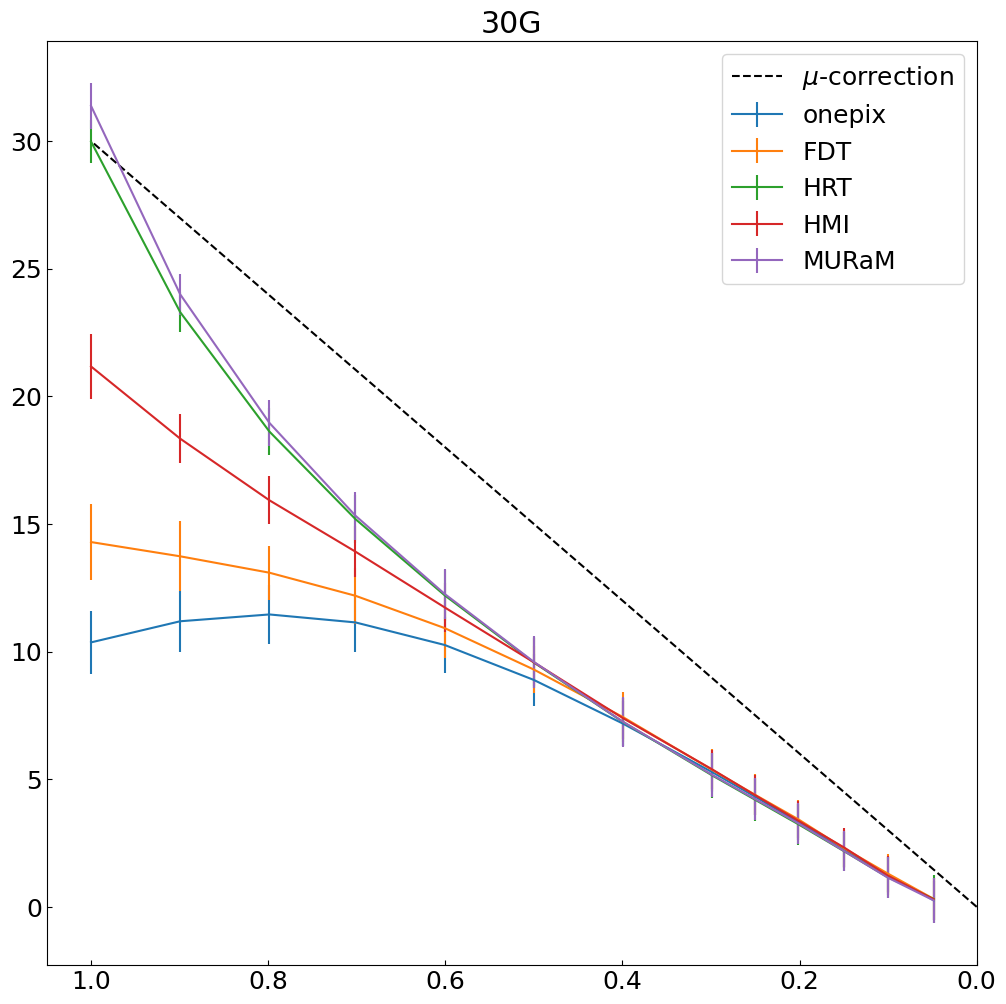

In [11]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_30a.mean(-1), yerr = res_one_30a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_30a.mean(-1), yerr = res_fdt_30a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_30a.mean(-1), yerr = res_hrt_30a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_30a.mean(-1), yerr = res_hmi_30a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_30a.mean(-1), yerr = res_MURaM_30a.std(-1), label = 'MURaM')
# plt.errorbar(mu_vals[::-1], blos_30a.mean(-1), yerr =  blos_30a.std(-1), label = '6Mmx6Mm')
plt.plot(np.linspace(0,1,20),np.linspace(0,30,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("30G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 50G

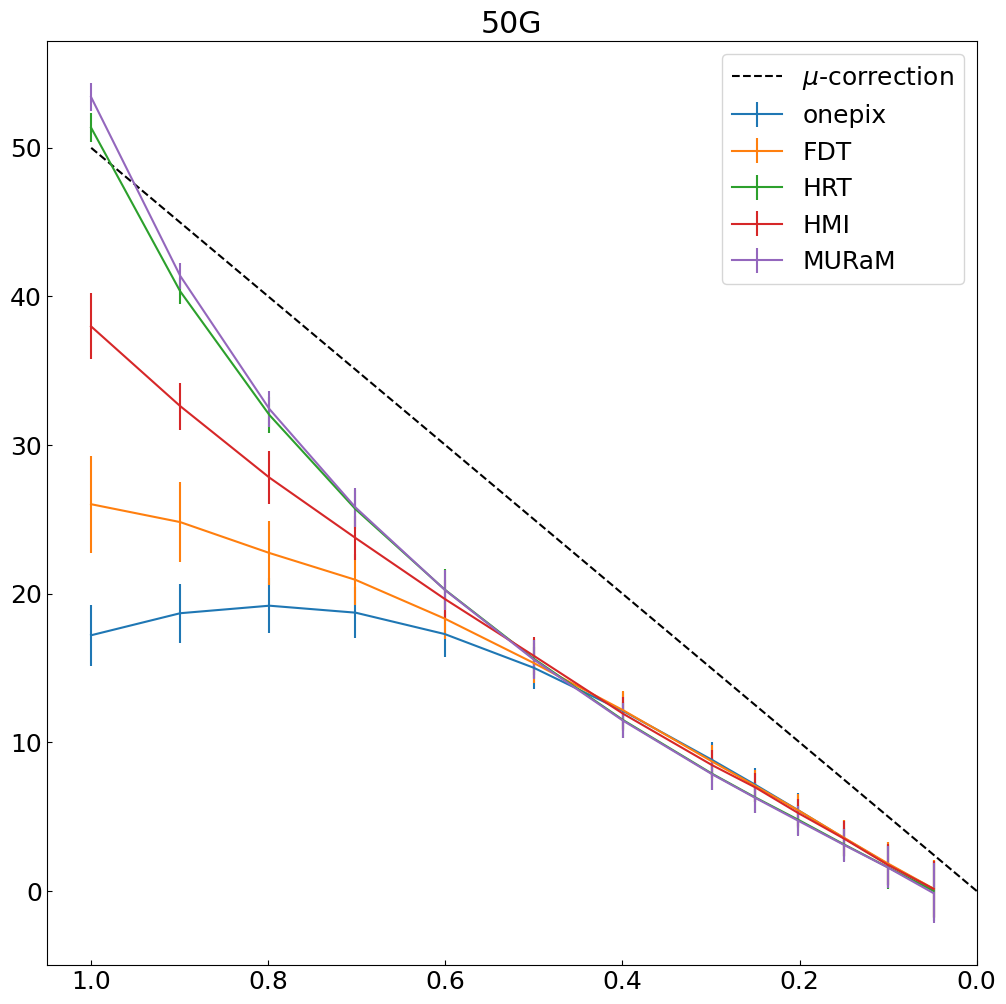

In [12]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_50a.mean(-1), yerr = res_one_50a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_50a.mean(-1), yerr = res_fdt_50a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_50a.mean(-1), yerr = res_hrt_50a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_50a.mean(-1), yerr = res_hmi_50a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_50a.mean(-1), yerr = res_MURaM_50a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,50,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("50G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 100G

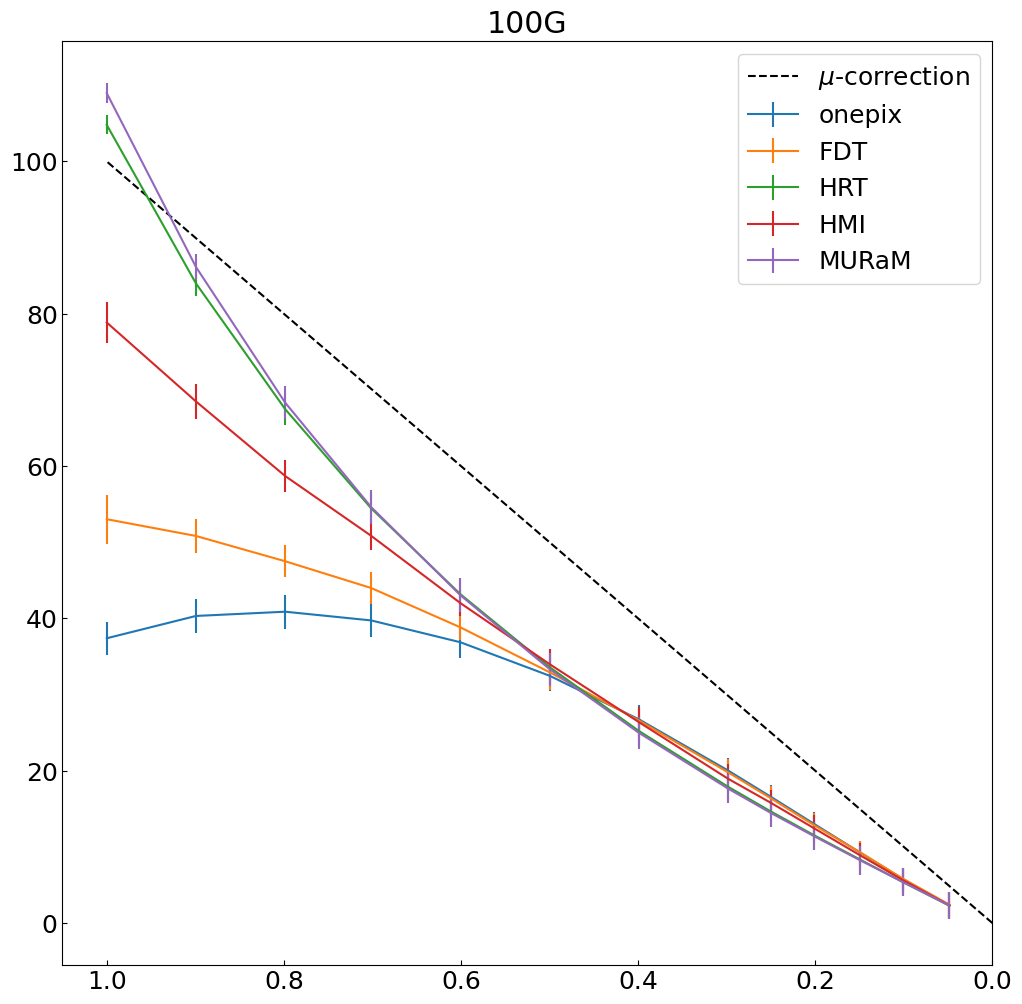

In [13]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_100a.mean(-1), yerr = res_one_100a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_100a.mean(-1), yerr = res_fdt_100a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_100a.mean(-1), yerr = res_hrt_100a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_100a.mean(-1), yerr = res_hmi_100a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_100a.mean(-1), yerr = res_MURaM_100a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,100,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("100G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 120G

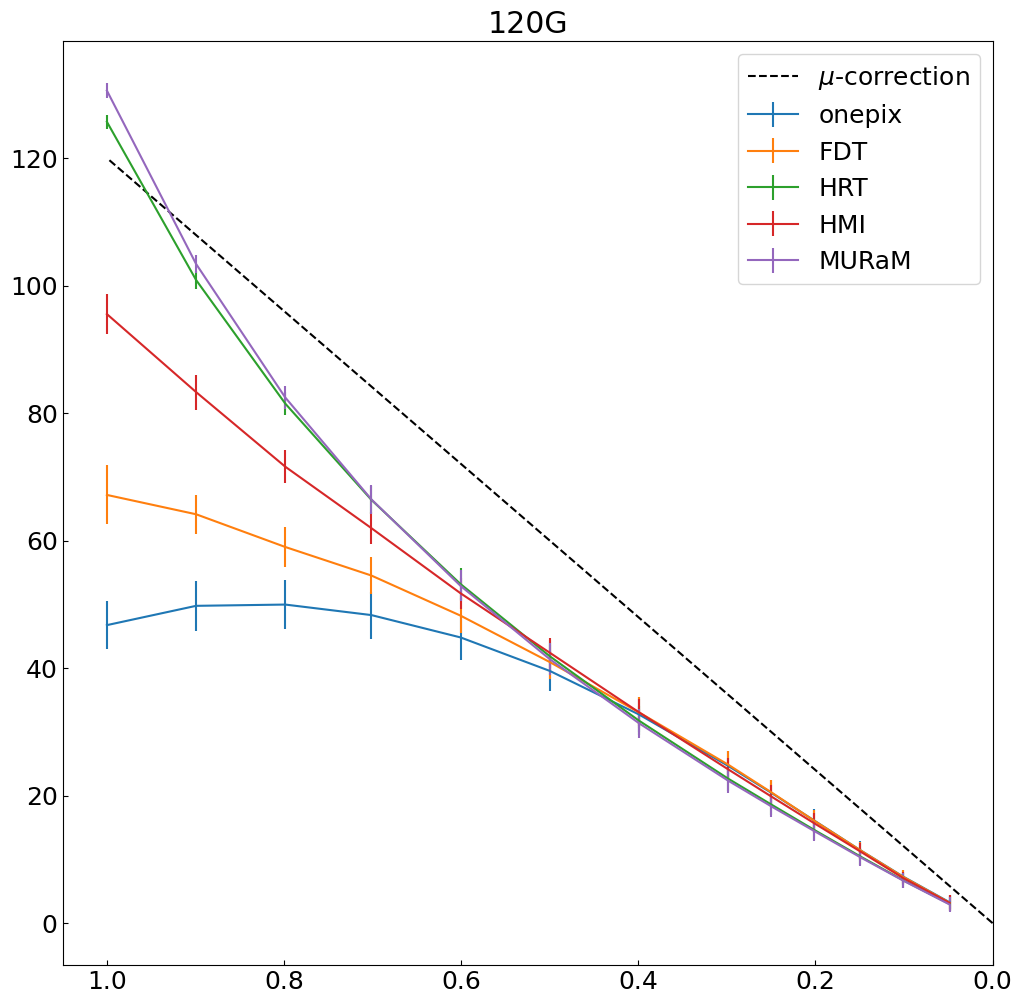

In [14]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_120a.mean(-1), yerr = res_one_120a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_120a.mean(-1), yerr = res_fdt_120a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_120a.mean(-1), yerr = res_hrt_120a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_120a.mean(-1), yerr = res_hmi_120a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_120a.mean(-1), yerr = res_MURaM_120a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,120,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("120G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 200G

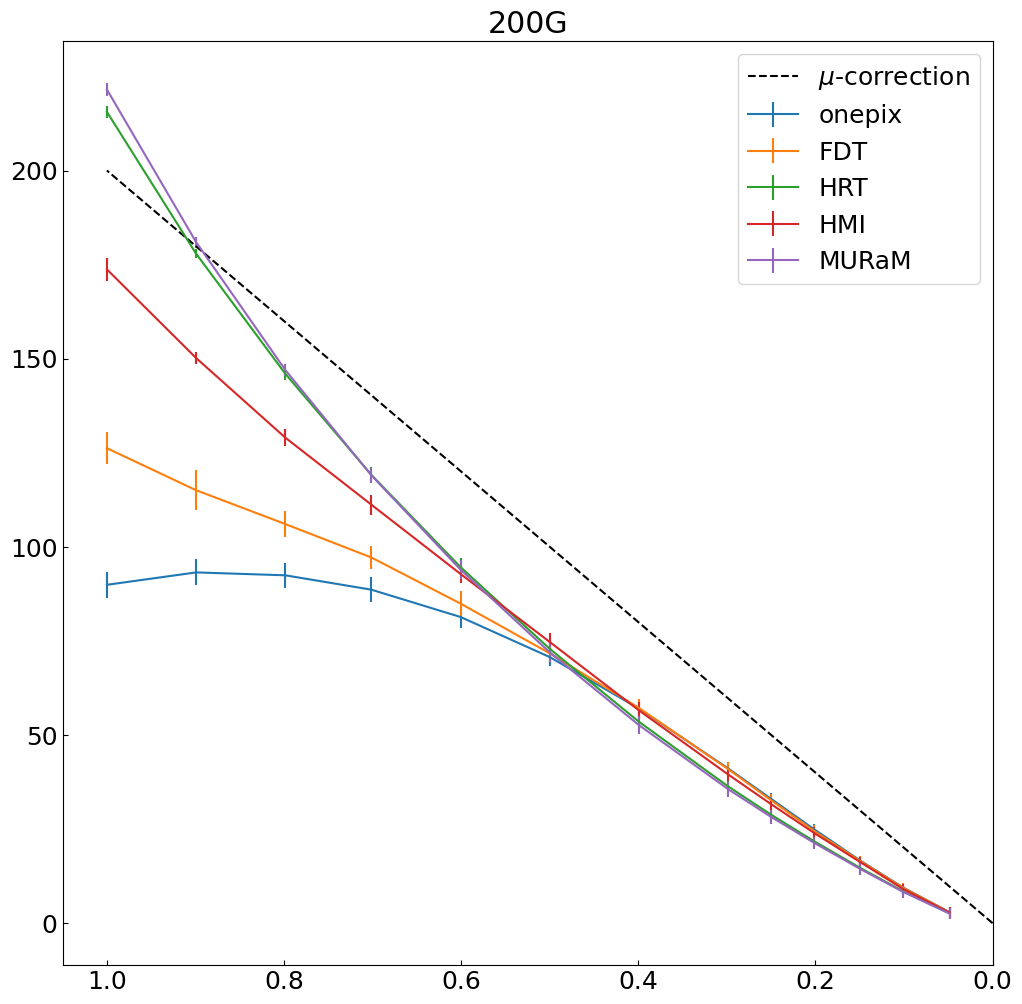

In [15]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_200a.mean(-1), yerr = res_one_200a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_200a.mean(-1), yerr = res_fdt_200a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_200a.mean(-1), yerr = res_hrt_200a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_200a.mean(-1), yerr = res_hmi_200a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_200a.mean(-1), yerr = res_MURaM_200a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,200,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("200G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

In [38]:
res_one_200[4,:]

array([83.06207429, 80.82304273, 83.45623468, 83.4680927 , 81.45497263,
       85.58422161, 80.99744596, 77.96208757, 54.69641414, 81.50977878,
       81.10884388, 21.34335344, 80.99318157, 77.29808587])

In [39]:
res_one_200[13+3,:]

array([8.32942949e+01, 8.03441487e+01, 8.31785385e+01, 8.22512715e+01,
       8.20594243e+01, 8.63662599e+01, 8.03094358e+01, 7.79544814e+01,
       7.29285522e+01, 8.44886246e+01, 8.19655754e+01, 3.58789654e-03,
       7.96261618e+01, 7.56984363e+01])